In [41]:
#导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#读取数据
df = pd.read_csv(r'.\traindata.csv')
print(df.apply(lambda  x: np.sum(x.isnull)))
path="D:\PythonProject\data\\trainlabel.txt"
with open(path,"r") as f:
    content=f.readlines()
target=[]
for item in content:
    target.append(int(item))
num_columns=['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
cat_columns=['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
#将target转换为numpy.array
target=np.array(target)
#离散型变量进行热编码
encode_df = pd.get_dummies(df,columns=cat_columns)
#连续型变量归一化
# 对连续型变量进行z-score标准化，经处理数据符合标准正态分布，均值为0，标准差为1,然后，删除未标准化数据，将标准化后数据合并。
num_mean=encode_df[num_columns].mean()
num_std=encode_df[num_columns].std()
num_normal=(encode_df[num_columns]-num_mean)/num_std
encode_df=encode_df.drop(columns=num_columns)
encode_df=pd.concat([encode_df,num_normal],axis=1)
features=encode_df.columns
encode_df=encode_df.values
encode_df

age               <bound method Series.isnull of 0        77\n1 ...
workclass         <bound method Series.isnull of 0              ...
fnlwgt            <bound method Series.isnull of 0        177550...
education         <bound method Series.isnull of 0           Bac...
education.num     <bound method Series.isnull of 0        13\n1 ...
marital.status    <bound method Series.isnull of 0           Mar...
occupation        <bound method Series.isnull of 0            Ad...
relationship      <bound method Series.isnull of 0              ...
race              <bound method Series.isnull of 0              ...
sex               <bound method Series.isnull of 0          Male...
capital.gain      <bound method Series.isnull of 0        3818\n...
capital.loss      <bound method Series.isnull of 0           0\n...
hours.per.week    <bound method Series.isnull of 0        14\n1 ...
native.country    <bound method Series.isnull of 0        United...
dtype: object


array([[False, False, True, ..., 0.38329204507822184,
        -0.21468477429230073, -2.14862628208541],
       [False, False, False, ..., -0.14505703491473115,
        -0.21468477429230073, 0.775195088443529],
       [False, False, False, ..., -0.14505703491473115,
        3.690712227332089, 0.775195088443529],
       ...,
       [False, False, False, ..., -0.14505703491473115,
        -0.21468477429230073, -0.0369775144811762],
       [True, False, False, ..., -0.14505703491473115,
        -0.21468477429230073, -0.0369775144811762],
       [False, False, False, ..., -0.14505703491473115,
        -0.21468477429230073, -0.8491501174058814]], dtype=object)

C:\Users\86159\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


score: 0.8534573534573534
auc: 0.904447344620432
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4326
           1       0.73      0.63      0.67      1372

    accuracy                           0.85      5698
   macro avg       0.81      0.78      0.79      5698
weighted avg       0.85      0.85      0.85      5698



C:\Users\86159\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1346: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


Text(0, 0.5, 'precision')

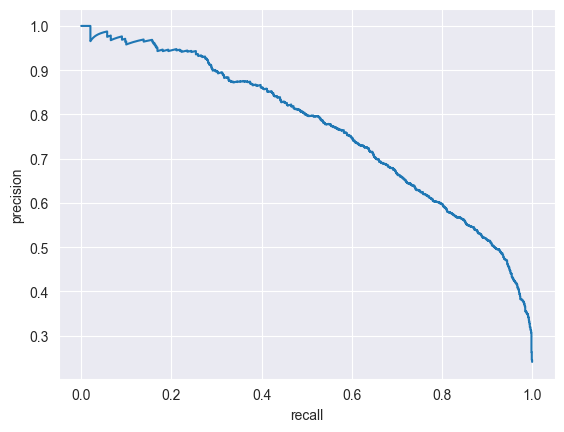

In [42]:
# encode_df
from sklearn.model_selection import StratifiedShuffleSplit #分层交叉验证
#使用分层交叉验证的方式，将整个数据集划分为训练集（train）和测试集（test）。
sss=StratifiedShuffleSplit(n_splits=2,train_size=0.75)
for train_index,test_index in sss.split(encode_df,target):
    trainx,testx = encode_df[train_index],encode_df[test_index]
    trainy,testy = target[train_index],target[test_index]
###############################################################################################
#导入Logistic回归模型，对训练集数据拟合后，得出模型的准确率约为84.74%。
from sklearn.linear_model import SGDClassifier
lr=SGDClassifier(loss='log',max_iter=100)
lr.fit(trainx,trainy)
print("score:",lr.score(testx,testy))

#模型评估
from sklearn.metrics import roc_auc_score,precision_recall_curve,classification_report,roc_curve
#auc值和分类报告。
pred=lr.predict_log_proba(testx)[:,1]
pred_labels=lr.predict(testx)
print("auc:",roc_auc_score(testy,pred))
print(classification_report(testy,pred_labels))

#PR曲线
precision,recall,_ = precision_recall_curve(testy,pred)
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
##ROC曲线下方面积反应模型的好坏。若面积为1，则可能发生过拟合；若在0.5-1之间，则可能具有预测性，若小于0.5，则是一个糟糕的模型，不过可以进行反向预测。本次建模拟合中，auc值约为0.903，即ROC曲线下面积约为90.3%，可以说得到了一个较为理想的模型。

In [43]:
for item in features:
    print(item)

workclass_?
workclass_Federal-gov
workclass_Local-gov
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_10th
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital.status_Divorced
marital.status_Married-AF-spouse
marital.status_Married-civ-spouse
marital.status_Married-spouse-absent
marital.status_Never-married
marital.status_Separated
marital.status_Widowed
occupation_?
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_

0.868023868023868
0.9219947291379401
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4326
           1       0.76      0.65      0.70      1372

    accuracy                           0.87      5698
   macro avg       0.83      0.80      0.81      5698
weighted avg       0.86      0.87      0.86      5698



Text(0, 0.5, 'precision')

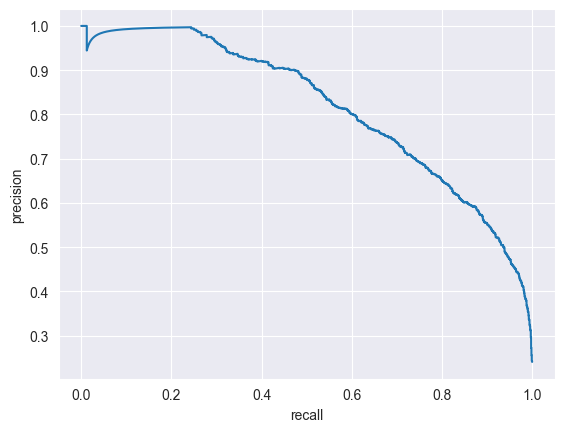

In [44]:
#除了线性模型，还可以尝试一下非线性模型。
from sklearn.ensemble import GradientBoostingClassifier
rfc=GradientBoostingClassifier(max_depth=6)
rfc.fit(trainx,trainy)
print(rfc.score(testx,testy))
pred=rfc.predict_proba(testx)[:,1]
pred_labels=rfc.predict(testx)
print(roc_auc_score(testy,pred))
print(classification_report(testy,pred_labels))
#PR曲线
precision,recall,_ = precision_recall_curve(testy,pred)
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
#上图所示，auc值约为0.925%，高于之前用LR模型计算出的auc值0.903，该模型更优于LR模型。

col_0      0     1
row_0             
0      12413  1125
1        564  2992
gbdt score in train 0.9011934011934012
gbdt score in test 0.8676728676728677


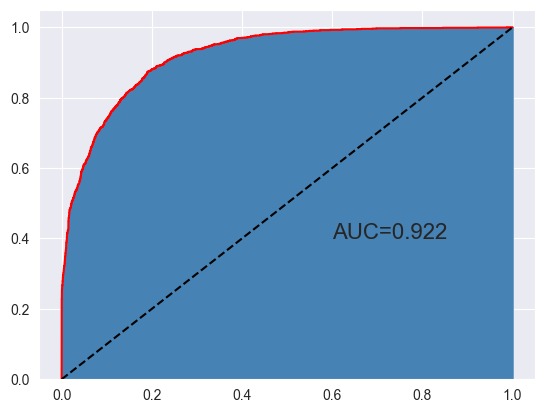

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
rfc=GradientBoostingClassifier(max_depth=6)
rfc.fit(trainx,trainy)
pred_labels=rfc.predict(trainx)
print(pd.crosstab(pred_labels,trainy))
print("gbdt score in train",rfc.score(trainx,trainy))
print("gbdt score in test",rfc.score(testx,testy))
from sklearn import metrics
# 计算ROC曲线的x轴 和 y轴数据
fpr, tpr, _ = metrics.roc_curve(testy, rfc.predict_proba(testx)[:,1])
# 绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
# 添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
# 绘制参考线
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
# 添加文本
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

In [49]:
test_df = pd.read_csv(r'.\testdata.csv')
#离散型变量进行热编码
encode_df = pd.get_dummies(test_df,columns=cat_columns)
#连续型变量归一化
# 对连续型变量进行z-score标准化，经处理数据符合标准正态分布，均值为0，标准差为1,然后，删除未标准化数据，将标准化后数据合并。
num_mean=encode_df[num_columns].mean()
num_std=encode_df[num_columns].std()
num_normal=(encode_df[num_columns]-num_mean)/num_std
encode_df=encode_df.drop(columns=num_columns)
encode_df=pd.concat([encode_df,num_normal],axis=1)

for item in encode_df.columns:
    if item not in features:
        encode_df=encode_df.drop(columns=item)
encode_df=encode_df.values
test_label=rfc.predict(encode_df)
# test_label
for item in test_label:
    print(item)


0
1
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
1
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [59]:
path=".\\testlabel2.txt"
np.savetxt(path,test_label,fmt='%d')

In [48]:
# test_label_2=rfc.predict(encode_df)
# cnt=0
# for i in range(len(test_label)):
#     if test_label[i]!=test_label_2[i]:
#         cnt=cnt+1
# cnt
# 朴素贝叶斯类
# from sklearn.naive_bayes import GaussianNB
# # 创建朴素贝叶斯分类器
# gnb_clf = GaussianNB()
# # 使用样本数据训练朴素贝叶斯模型
# gnb_clf.fit(trainx, trainy)
# gnb_clf.score(trainx,trainy)
